In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df = pd.read_csv('PPP_ORIGINAL.csv', parse_dates=["DateApproved"]).drop_duplicates()
df.head(10)

,LoanRange,BusinessName,Address,City,State,Zip,NAICSCode,BusinessType,RaceEthnicity,Gender,Veteran,NonProfit,JobsRetained,DateApproved,Lender,CD
0,a $5-10 million,"ARCTIC SLOPE NATIVE ASSOCIATION, LTD.",7000 Uula St,BARROW,AK,99723.0,813920.0,Non-Profit Organization,Unanswered,Unanswered,Unanswered,Y,295.0,2020-04-14,"National Cooperative Bank, National Association",AK - 00
1,a $5-10 million,CRUZ CONSTRUCTION INC,7000 East Palmer Wasilla Hwy,PALMER,AK,99645.0,238190.0,Subchapter S Corporation,Unanswered,Unanswered,Unanswered,NaN,215.0,2020-04-15,First National Bank Alaska,AK - 00
2,a $5-10 million,"I. C. E. SERVICES, INC",2606 C Street,ANCHORAGE,AK,99503.0,722310.0,Corporation,Unanswered,Unanswered,Unanswered,NaN,367.0,2020-04-11,KeyBank National Association,AK - 00
3,a $5-10 million,KATMAI HEALTH SERVICES LLC,"11001 O'MALLEY CENTRE DRIVE, SUITE 204",ANCHORAGE,AK,99515.0,621111.0,Limited Liability Company(LLC),Unanswered,Unanswered,Unanswered,NaN,0.0,2020-04-29,Truist Bank d/b/a Branch Banking & Trust Co,AK - 00
4,a $5-10 million,MATANUSKA TELEPHONE ASSOCIATION,1740 S. CHUGACH ST,PALMER,AK,99645.0,517311.0,Cooperative,Unanswered,Unanswered,Unanswered,NaN,267.0,2020-06-10,CoBank ACB,AK - 00
5,a $5-10 million,"NANA WORLEY, LLC","3700 Centerpoint Drive, 7th floor",ANCHORAGE,AK,99503.0,541330.0,Limited Liability Company(LLC),Unanswered,Unanswered,Unanswered,NaN,231.0,2020-05-19,First National Bank Alaska,AK - 00
6,a $5-10 million,"NORTHERN ENERGY SERVICES, LLC",6250 South Airpark Place,ANCHORAGE,AK,99502.0,213112.0,Limited Liability Company(LLC),Unanswered,Unanswered,Unanswered,NaN,298.0,2020-04-06,Northrim Bank,AK - 00
7,a $5-10 million,SOUTH PENINSULA HOSPITAL INC,4300 BARTLETT STREET,HOMER,AK,99603.0,622110.0,Corporation,Unanswered,Unanswered,Unanswered,NaN,439.0,2020-04-14,First National Bank Alaska,AK - 00
8,a $5-10 million,"TATITLEK TECHNOLOGIES, INC.",561 E. 36th Avenue,ANCHORAGE,AK,99503.0,518210.0,Corporation,Unanswered,Unanswered,Unanswered,NaN,361.0,2020-04-14,KeyBank National Association,AK - 00
9,a $5-10 million,"TYONEK GLOBAL SERVICES, LLC",1689 C ST,ANCHORAGE,AK,99501.0,611420.0,Limited Liability Company(LLC),Unanswered,Unanswered,Unanswered,NaN,0.0,2020-04-30,BBVA USA,AK - 00


### How much of this business are non-profitable?

In [3]:
df_temp = df.dropna()
df_temp['NonProfit'].count()

39293

### What is the state with higher number of payrolls aproved? 

##### Task one: group by State and count data approved

In [4]:
df_temp = df.groupby(by='State').count()
df_temp = df_temp.rename({'DateApproved': 'Number of Loans Approved'}, axis='columns')
df_temp['Number of Loans Approved']

State
AK     1652
AL     7872
AR     4256
AS       19
AZ    11326
CA    87686
CO    13385
CT     8595
DC     2806
DE     2072
FL    42207
GA    18291
GU      296
HI     3228
IA     5936
ID     3313
IL    27412
IN    11853
KS     5858
KY     6438
LA     9060
MA    18252
MD    12919
ME     2840
MI    19970
MN    13719
MO    11459
MP       56
MS     3890
MT     2196
NC    16324
ND     2178
NE     4179
NH     3441
NJ    21857
NM     3002
NV     5542
NY    46887
OH    22888
OK     6848
OR     9223
PA    26095
PR     1941
RI     2453
SC     7615
SD     1944
TN    11269
TX    52149
UT     6737
VA    16178
VI      172
VT     1542
WA    15849
WI    12355
WV     2300
WY     1363
XX       16
Name: Number of Loans Approved, dtype: int64

##### Task two: sort values and graphic them

In [5]:
df_temp = df_temp['Number of Loans Approved'].sort_values(ascending=False)
df_temp = df_temp.head(10)
df_temp

State
CA    87686
TX    52149
NY    46887
FL    42207
IL    27412
PA    26095
OH    22888
NJ    21857
MI    19970
GA    18291
Name: Number of Loans Approved, dtype: int64

###### Creating a bin for graphic

In [6]:
states = df_temp.index
statesList = []

for state in states:
    statesList.append(state)
        
statesList

['CA', 'TX', 'NY', 'FL', 'IL', 'PA', 'OH', 'NJ', 'MI', 'GA']

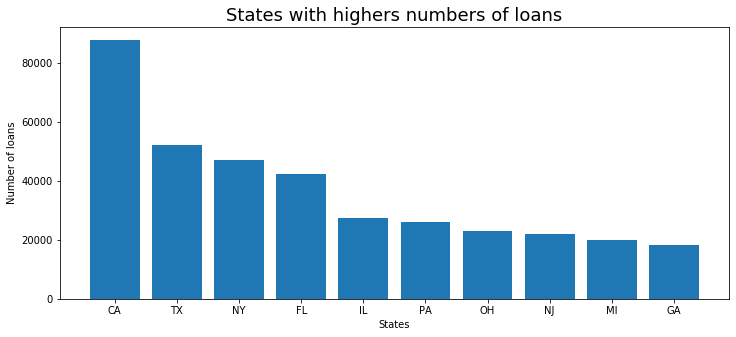

In [7]:
plt.figure(figsize=(12,5))
plt.bar(statesList, df_temp, width=.80)
plt.title('States with highers numbers of loans', fontsize=18)
plt.xlabel("States")
plt.ylabel("Number of loans")
plt.show()

### How many values of loans were disponible? 

##### Making a count of values from column LoanRange

In [8]:
df_temp2 = df['LoanRange'].drop_duplicates().sort_values(ascending=False)
labels = list(df_temp2)
labels

['e $150,000-350,000',
 'd $350,000-1 million',
 'c $1-2 million',
 'b $2-5 million',
 'a $5-10 million']

In [9]:
values = df['LoanRange'].value_counts()
values

e $150,000-350,000      379048
d $350,000-1 million    199455
c $1-2 million           53029
b $2-5 million           24837
a $5-10 million           4840
Name: LoanRange, dtype: int64

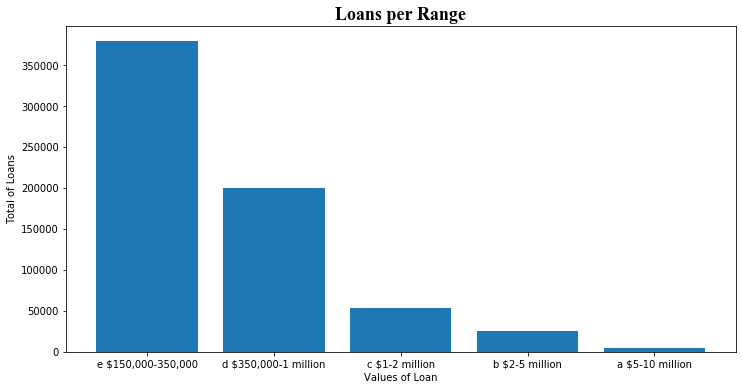

In [10]:
plt.figure(figsize=(12,6))
plt.title('Loans per Range', fontdict={'fontname': 'Times New Roman', 'fontsize': 18})
plt.bar(labels, values) # x -> labels, y -> values
plt.xlabel('Values of Loan')
plt.ylabel('Total of Loans')
plt.show()

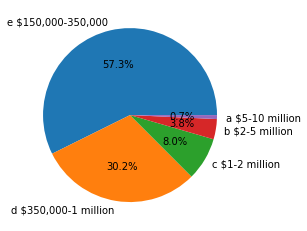

In [11]:
plt.pie(values, labels=labels, autopct='%1.1f%%')
plt.show()

### Number of jobs retained

In [12]:
df.head(0)

,LoanRange,BusinessName,Address,City,State,Zip,NAICSCode,BusinessType,RaceEthnicity,Gender,Veteran,NonProfit,JobsRetained,DateApproved,Lender,CD


In [13]:
df['JobsRetained'][df.JobsRetained != 0][df.LoanRange == 'a $5-10 million'].dropna().mean()

389.66627050154506

##### How many jobs were retained based on states?

In [14]:
df_temp = df.dropna()
df_temp.head(3)

,LoanRange,BusinessName,Address,City,State,Zip,NAICSCode,BusinessType,RaceEthnicity,Gender,Veteran,NonProfit,JobsRetained,DateApproved,Lender,CD
0,a $5-10 million,"ARCTIC SLOPE NATIVE ASSOCIATION, LTD.",7000 Uula St,BARROW,AK,99723.0,813920.0,Non-Profit Organization,Unanswered,Unanswered,Unanswered,Y,295.0,2020-04-14,"National Cooperative Bank, National Association",AK - 00
25,b $2-5 million,"ANCHORAGE COMMUNITY MENTAL HEALTH SERVICES, INC.",4020 FOLKER STREET,ANCHORAGE,AK,99508.0,621498.0,Non-Profit Organization,Unanswered,Unanswered,Unanswered,Y,168.0,2020-04-09,First National Bank Alaska,AK - 00
39,b $2-5 million,"FAMILY CENTERED SERVICES OF ALASKA, INC.",1825 Marika Rd.,FAIRBANKS,AK,99709.0,621420.0,Non-Profit Organization,Unanswered,Male Owned,Unanswered,Y,145.0,2020-04-03,Northrim Bank,AK - 00


In [15]:
df_temp = df_temp.groupby(by='State').sum().sort_values(by='JobsRetained', ascending=False)

labels_state = list(df_temp.head(10).index)
values_jobs = list(df_temp['JobsRetained'].head(10))

values

e $150,000-350,000      379048
d $350,000-1 million    199455
c $1-2 million           53029
b $2-5 million           24837
a $5-10 million           4840
Name: LoanRange, dtype: int64

In [42]:
states = df_temp.head(10).index
jobs = df_temp['JobsRetained'].head(10)
jobs

State
CA    324187.0
NY    271449.0
TX    189024.0
PA    146410.0
IL    141241.0
FL    139672.0
OH    126452.0
MA     97802.0
MN     86760.0
MI     83666.0
Name: JobsRetained, dtype: float64

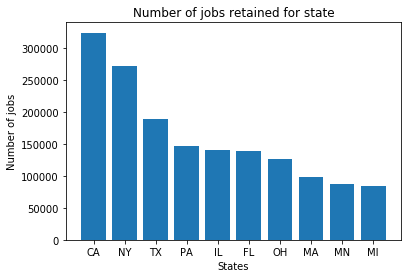

In [43]:
fig, ax = plt.subplots()

ax.bar(states, jobs)

ax.set_title('Number of jobs retained for state')
ax.set_xlabel('States')
ax.set_ylabel('Number of jobs')

plt.show()

##### Converting strings to dates

In [17]:
def new_data(dateStr):
    return pd.to_datetime(dateStr)

df['DateApproved'] = df['DateApproved'].apply(new_data)

### Creating a graphic of lines with jobs retained

In [18]:
labelsData = df['DateApproved'].drop_duplicates()
labelsData = labelsData.sort_values(ascending=True)
labelsData

39      2020-04-03
17      2020-04-04
30      2020-04-05
6       2020-04-06
51      2020-04-07
           ...    
845     2020-06-26
2434    2020-06-27
11739   2020-06-28
81      2020-06-29
287     2020-06-30
Name: DateApproved, Length: 79, dtype: datetime64[ns]

In [19]:
valuesData = df.groupby('DateApproved').sum()
valuesData = valuesData['JobsRetained']

#### First try with plot from plt

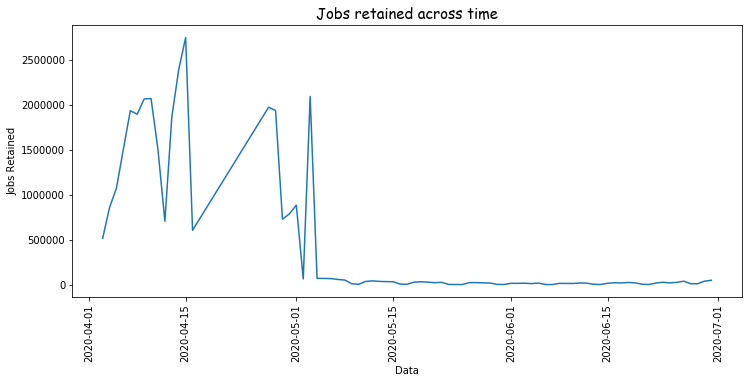

In [20]:
plt.figure(figsize=(12,5))
plt.plot(labelsData, valuesData)
plt.title("Jobs retained across time", fontdict={'fontname': 'Comic Sans MS', 'fontsize': 15})
plt.xticks(rotation=90, fontstretch='ultra-expanded')
plt.xlabel("Data")
plt.ylabel("Jobs Retained")
plt.show()

#### Second try with pivot table from pandas

### Creating a second dataframe with dates as index

In [21]:
df_dates = pd.read_csv('PPP_ORIGINAL.csv', parse_dates=["DateApproved"], index_col='DateApproved')
df_dates = df_dates.sort_values(by='DateApproved', ascending=True)

In [22]:
df_dates = df_dates.dropna(subset=['JobsRetained'])
df_dates

,LoanRange,BusinessName,Address,City,State,Zip,NAICSCode,BusinessType,RaceEthnicity,Gender,Veteran,NonProfit,JobsRetained,Lender,CD
DateApproved,,,,,,,,,,,,,,,
2020-04-03,b $2-5 million,"KIDWELL, INC.",3333 FOLKWAYS CIR,LINCOLN,NE,68504.0,238210.0,Corporation,Unanswered,Unanswered,Unanswered,NaN,221.0,NebraskaLand National Bank,NE - 01
2020-04-03,"e $150,000-350,000","CONLEY GROUP, INC.",2867 104th St.,URBANDALE,IA,50322.0,561612.0,Corporation,Unanswered,Male Owned,Unanswered,NaN,26.0,Success Bank,IA - 03
2020-04-03,"e $150,000-350,000",ARORA'S FAMILY INC,1409 E. Ohio St. Clinton,CLINTON,MO,64735.0,445120.0,Corporation,Unanswered,Unanswered,Unanswered,NaN,43.0,Legacy Bank & Trust Company,MO - 04
2020-04-03,"e $150,000-350,000","BROX, INC.",4101 Mormon Coulee Rd,LA CROSSE,WI,54601.0,722513.0,Limited Liability Company(LLC),White,Male Owned,Non-Veteran,NaN,51.0,River Bank,WI - 03
2020-04-03,"d $350,000-1 million",JW MANAGEMENT GROUP INC,3798 E PARKVIEW DR,GILBERT,AZ,85295.0,812112.0,Corporation,White,Male Owned,Non-Veteran,NaN,66.0,Unison Bank,AZ - 05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-06-30,a $5-10 million,"GOSIGER HOLDINGS, INC",108 McDonough St,DAYTON,OH,45402.0,423830.0,Corporation,Unanswered,Unanswered,Unanswered,NaN,484.0,KeyBank National Association,OH - 10
2020-06-30,"e $150,000-350,000",WORLDWIDE DISTRIBUTION SYSTEMS USA,STE 200 32985 HAMILTON CT,FARMINGTN HLS,MI,48334.0,423620.0,Limited Liability Company(LLC),Unanswered,Unanswered,Unanswered,NaN,15.0,Cross River Bank,MI - 09
2020-06-30,"e $150,000-350,000",THE SOLAR QUOTE LLC,4422 N Pershing Ave Suite D22,STOCKTON,CA,95207.0,238210.0,Limited Liability Company(LLC),Unanswered,Unanswered,Unanswered,NaN,12.0,Customers Bank,CA - 09


### How many owners are male and female? 

In [23]:
labelsG = list(df['Gender'].drop_duplicates())
valuesG = list(df['Gender'].value_counts())

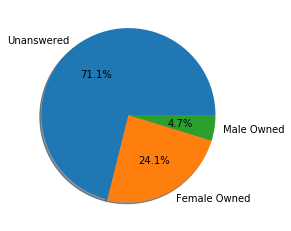

In [24]:
fig, ax = plt.subplots()
ax.pie(valuesG, labels=labelsG, shadow=True, autopct='%1.1f%%')
plt.show()

### What is the percentage of ethnicity in this dataset?

In [25]:
labelsR = list(df['RaceEthnicity'].drop_duplicates())
labelsR.remove('Unanswered')
labelsR

['American Indian or Alaska Native',
 'White',
 'Black or African American',
 'Asian',
 'Hispanic',
 'Puerto Rican']

In [26]:
valuesR = list(df['RaceEthnicity'][df.RaceEthnicity != 'Unanswered'].value_counts())
valuesR

[78782, 7139, 6201, 1827, 551, 1]

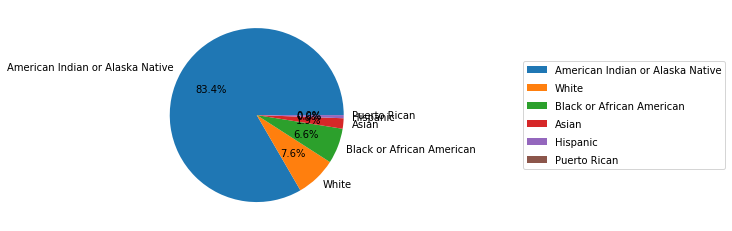

In [27]:
fig, ax = plt.subplots()
texts = ax.pie(valuesR, labels=labelsR, autopct='%1.1f%%')   
ax.legend(loc= 'center left', bbox_to_anchor=(1.7, 0.5), labelspacing=0.8)
plt.show()

In [28]:
countRE =  df['RaceEthnicity'].value_counts()
countRE 

Unanswered                          566708
White                                78782
Asian                                 7139
Hispanic                              6201
Black or African American             1827
American Indian or Alaska Native       551
Puerto Rican                             1
Name: RaceEthnicity, dtype: int64